# Third Model: Decision Tree Regressor

## Fetch Processed Data

In [ ]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

Cloning into 'amazon_sales_prediction'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 106 (delta 39), reused 61 (delta 11), pack-reused 0
Receiving objects: 100% (106/106), 9.12 MiB | 9.14 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('amazon_sales_prediction/data.csv')
data.head()

,sub_category,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,0,4.1,2092.0,4.590915,7.205687,36.287625,8577.2
1,1,4.4,7943.0,132.534040,240.872394,44.977489,34949.2
2,0,3.8,229.0,2.482227,12.049645,79.400000,870.2
3,0,3.7,33.0,2.156886,18.062417,88.058706,122.1
4,2,3.6,37.0,0.409688,0.590433,30.612245,133.2


## Preparation for Training

In [ ]:
from sklearn.model_selection import train_test_split

y = data['ratings']
X = data.drop('ratings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2500, 6)
(278, 6)
(2500,)
(278,)


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = regr_1.predict(X_test)
y_pred_train = regr_1.predict(X_train)
mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_train, y_pred_train)
print(f'Test MSE for baseline Decision Tree Regressor: {mse1}')
print(f'Train MSE for baseline Decision Tree Regressor: {mse2}')


Test MSE for baseline Decision Tree Regressor: 0.17296173592739345
Train MSE for baseline Decision Tree Regressor: 0.15964634637823666


## Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

best_mse = float('inf')
best_max_depth = None

best_params = {}
train_mse_history = {"squared_error": [], "friedman_mse": [], "absolute_error": [], "poisson": []}
test_mse_history = {"squared_error": [], "friedman_mse": [], "absolute_error": [], "poisson": []}


criterion_options = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
max_depth_range = range(1, 40)

for criterion in criterion_options:
    for max_depth in max_depth_range:
        regr = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth)
        regr.fit(X_train, y_train)

        y_pred_train = regr.predict(X_train)
        y_pred = regr.predict(X_test)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred)
        train_mse_history[criterion].append(train_mse)
        test_mse_history[criterion].append(test_mse)
        print(f"Criterion: {criterion}, Max Depth: {max_depth}, Test MSE: {test_mse}")

        if test_mse < best_mse:
            best_mse = test_mse
            best_params['criterion'] = criterion
            best_params['max_depth'] = max_depth

print(f"Best Criterion: {best_params['criterion']}, Best Max Depth: {best_params['max_depth']}, Best MSE: {best_mse}")

Criterion: squared_error, Max Depth: 1, Test MSE: 0.19209759140658353
Criterion: squared_error, Max Depth: 2, Test MSE: 0.17296173592739328
Criterion: squared_error, Max Depth: 3, Test MSE: 0.14267122587165645
Criterion: squared_error, Max Depth: 4, Test MSE: 0.134809785251634
Criterion: squared_error, Max Depth: 5, Test MSE: 0.12634140870974972
Criterion: squared_error, Max Depth: 6, Test MSE: 0.12792799515958705
Criterion: squared_error, Max Depth: 7, Test MSE: 0.12300817579570882
Criterion: squared_error, Max Depth: 8, Test MSE: 0.13220804645667678
Criterion: squared_error, Max Depth: 9, Test MSE: 0.12856329793069832
Criterion: squared_error, Max Depth: 10, Test MSE: 0.129124235157796
Criterion: squared_error, Max Depth: 11, Test MSE: 0.15151480129561548
Criterion: squared_error, Max Depth: 12, Test MSE: 0.15110329577947
Criterion: squared_error, Max Depth: 13, Test MSE: 0.14351449475390232
Criterion: squared_error, Max Depth: 14, Test MSE: 0.1256649835590704
Criterion: squared_erro

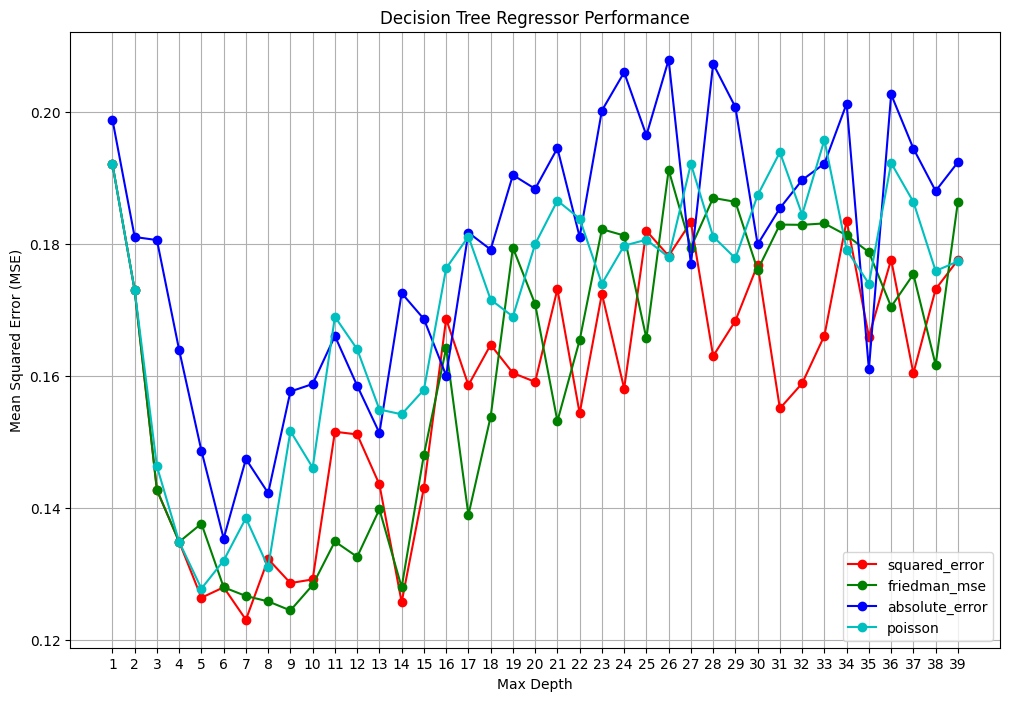

In [ ]:
depth = np.arange(1, len(train_mse_history[best_params['criterion']]) + 1)
colors = ['r', 'g', 'b', 'c']
plt.figure(figsize=(12, 8))
for i in range(4):
  plt.plot(depth, test_mse_history[criterion_options[i]], marker='o', color=colors[i], label=criterion_options[i])
plt.title('Decision Tree Regressor Performance')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(np.arange(1, 40, step=1))
plt.legend()  # 라벨 표시
plt.show()

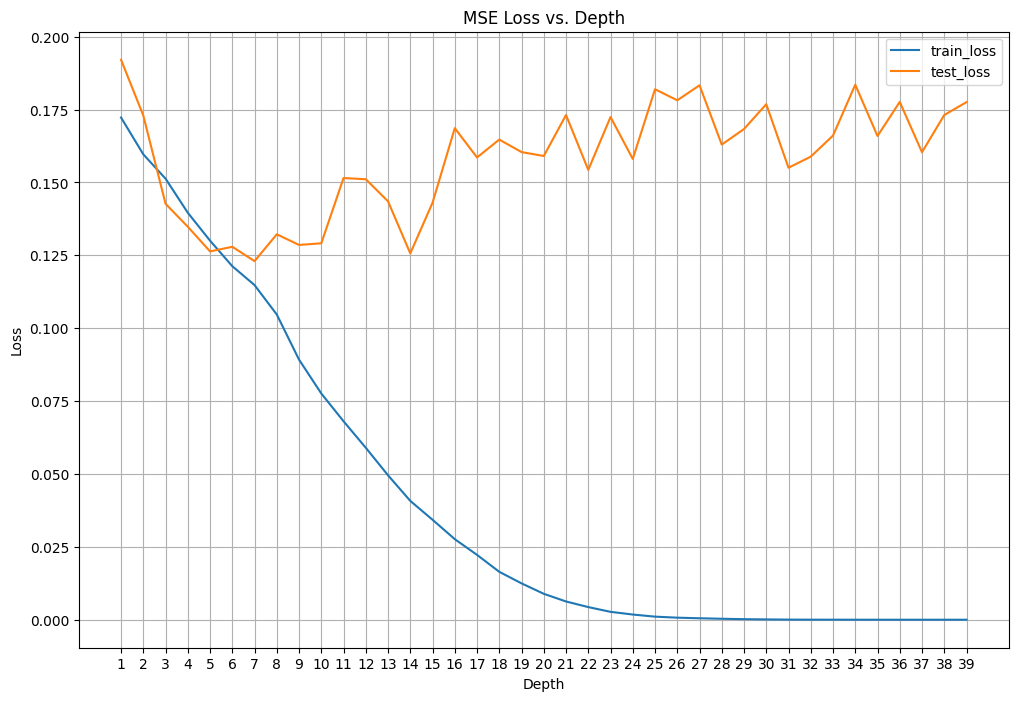

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(depth, train_mse_history['squared_error'], label='train_loss')
plt.plot(depth, test_mse_history['squared_error'], label='test_loss')

plt.xlabel('Depth')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss vs. Depth')
plt.xticks(np.arange(1, 40, step=1))
plt.grid(True)
plt.show()